## Лабораторная работа 4
### Нагаев Александр 20-ИВТ-3
### Вариант 3

Цель лабораторной работы – получение навыков работы с методами регрессии
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


Классификаторы:
* Линейная регрессия без использования регуляризаторов
* Линейная регрессия, RIDGE регуляризатор

### Описание набора данных
#### Air Quality Data Set
Информация о наборе данных: Набор данных содержит 9358 экземпляров усредненных по часам измерений набора из 5 химических датчиков оксида металла, встроенных в химический мультисенсор качества воздуха. Устройство было расположено на поле в значительно загрязненном районе, на уровне дороги, в итальянском городе. Данные были записаны в период с марта 2004 года по февраль 2005 года (одинт год), что представляет собой самые длинные в свободном доступе записи измерений химических датчиков качества воздуха, установленных на местах. Среднечасовые концентрации CO, неметановых углеводородов, бензола, всех оксидов азота (NOx) и диоксид азота (NO2) и были предоставлены совместно расположенным эталонным сертифицированным анализатором. Доказательства перекрестной чувствительности, а также дрейфы концепции и датчиков присутствуют, как описано в De Vito et al., Sens. И Act. B, Vol. 129,2,2008 (требуется цитирование), в конечном итоге влияющие на возможности оценки концентрации датчиков. Пропущенные значения помечаются значением -200. Этот набор данных может использоваться исключительно для исследовательских целей. Коммерческие цели полностью исключены.

Входные переменные:

* Дата (ДД/ММ/ГГГГ)
* Время (ЧЧ.ММ.СС)
* Истинная почасовая усредненная концентрация CO в мг/м^3 (эталонный анализатор)
* PT 08.S1 (оксид олова) усредненный по часам отклик датчика (номинально CO))
* Истинная почасовая усредненная общая концентрация неметаллических углеводородов в мкг/м^3 (эталонный анализатор)
* Истинная почасовая усредненная концентрация бензола в мкг/м^3 (эталонный анализатор)
* PT08.S2 (титан) усредненный по часам отклик датчика (номинально NMHC))
* Истинная почасовая усредненная концентрация NOx в миллиардных долях (эталонный анализатор)
* PT08.S3 (оксид вольфрама) усредненный по часам отклик датчика (номинально NOx))
* Истинная почасовая усредненная концентрация NO2 в мкг/м^3 (эталонный анализатор)
* PT 08.S4 (оксид вольфрама) усредненный по часам отклик датчика (номинально NO2)
* PT08.S5 (оксид индия) усредненный по часам отклик датчика (номинально O3))
* Температура в ° C
* Относительная влажность (%)
* Абсолютная влажность (AH)


In [82]:
import pandas as pd
df = pd.read_csv('AirQualityUCI.csv', sep = ';', decimal = ',')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,NaN,NaN
9353,04/04/2005,11.00.00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,NaN,NaN
9354,04/04/2005,12.00.00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,NaN,NaN
9355,04/04/2005,13.00.00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139,NaN,NaN


In [83]:
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis = 1, inplace = True)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


Удаление дубликатов

In [84]:
print('До удаления:', df.shape)

До удаления: (9357, 15)


In [85]:
df.drop_duplicates(keep ='first', inplace =True)  
print('После удаления:', df.shape)

После удаления: (9357, 15)


Удаление пропущенных значений

In [86]:
(df[df.columns] == -200).sum()


Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [87]:
df.drop(['NMHC(GT)'], axis=1, inplace=True)
df = df.loc[df['CO(GT)'] != -200]
df = df.loc[df['NO2(GT)'] != -200]
df = df.loc[df['PT08.S1(CO)'] != -200]
(df[df.columns] == -200).sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [88]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [89]:
df.reset_index(inplace = True)
df.columns

Index(['index', 'Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [90]:
df

,index,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,10/03/2004,18.00.00,2.6,1360,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,1,10/03/2004,19.00.00,2.0,1292,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2,10/03/2004,20.00.00,2.2,1402,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3,10/03/2004,21.00.00,2.2,1376,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,4,10/03/2004,22.00.00,1.6,1272,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,9352,04/04/2005,10.00.00,3.1,1314,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
6937,9353,04/04/2005,11.00.00,2.4,1163,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
6938,9354,04/04/2005,12.00.00,2.4,1142,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
6939,9355,04/04/2005,13.00.00,2.1,1003,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [91]:
df.drop(['index'], axis = 1, inplace = True)
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,04/04/2005,10.00.00,3.1,1314,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
6937,04/04/2005,11.00.00,2.4,1163,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
6938,04/04/2005,12.00.00,2.4,1142,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
6939,04/04/2005,13.00.00,2.1,1003,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


Масштабирование количественных признаков

In [92]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [93]:
normilized_data = df.drop(['Date', 'Time', 'T'], axis = 1)

BoxPlot до масштабирования:


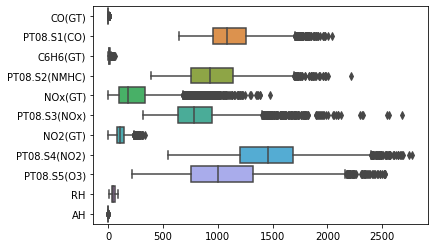

In [94]:
sns.boxplot(data = normilized_data, orient = 'h')
print('BoxPlot до масштабирования:')

BoxPlot после масштабирования:


<AxesSubplot:>

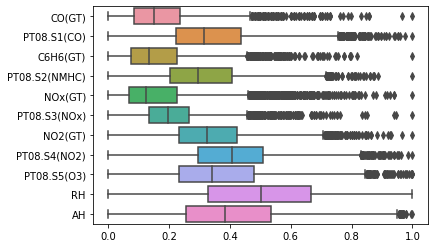

In [95]:
scaler = MinMaxScaler()
scaler.fit(normilized_data)
normilized_data = scaler.transform(normilized_data)

normilized_data = pd.DataFrame(normilized_data)

normilized_data.columns = df.drop(['Time', 'Date', 'T'], axis = 1).columns

print('BoxPlot после масштабирования:')
sns.boxplot(data = normilized_data, orient = 'h')

In [96]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,04/04/2005,10.00.00,3.1,1314,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
6937,04/04/2005,11.00.00,2.4,1163,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
6938,04/04/2005,12.00.00,2.4,1142,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
6939,04/04/2005,13.00.00,2.1,1003,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [97]:
df.drop(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
              'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH',
              'AH'], axis = 1, inplace = True)

df

,Date,Time,T
0,10/03/2004,18.00.00,13.6
1,10/03/2004,19.00.00,13.3
2,10/03/2004,20.00.00,11.9
3,10/03/2004,21.00.00,11.0
4,10/03/2004,22.00.00,11.2
...,...,...,...
6936,04/04/2005,10.00.00,21.9
6937,04/04/2005,11.00.00,24.3
6938,04/04/2005,12.00.00,26.9
6939,04/04/2005,13.00.00,28.3


In [98]:
df = pd.concat([normilized_data, df], axis = 1)
df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,Date,Time,T
0,0.211864,0.511845,0.184252,0.359649,0.111036,0.310885,0.335347,0.513040,0.454822,0.499371,0.287139,10/03/2004,18.00.00,13.6
1,0.161017,0.463029,0.144882,0.309759,0.068382,0.360864,0.271903,0.453237,0.326238,0.484277,0.270955,10/03/2004,19.00.00,13.3
2,0.177966,0.541996,0.138583,0.300987,0.087339,0.346463,0.338369,0.451439,0.370547,0.563522,0.283331,10/03/2004,20.00.00,11.9
3,0.177966,0.523331,0.141732,0.305921,0.115098,0.326133,0.362538,0.464478,0.426586,0.638994,0.301618,10/03/2004,21.00.00,11.0
4,0.127119,0.448672,0.099213,0.244518,0.087339,0.373994,0.344411,0.422212,0.386186,0.633962,0.302670,10/03/2004,22.00.00,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,0.254237,0.478823,0.209449,0.389803,0.318213,0.091910,0.567976,0.370054,0.655083,0.252830,0.286638,04/04/2005,10.00.00,21.9
6937,0.194915,0.370424,0.176378,0.349232,0.237644,0.119441,0.534743,0.320594,0.455256,0.182390,0.264141,04/04/2005,11.00.00,24.3
6938,0.194915,0.355348,0.192126,0.368969,0.197021,0.119017,0.522659,0.310252,0.378367,0.114465,0.228418,04/04/2005,12.00.00,26.9
6939,0.169492,0.255564,0.146457,0.313048,0.157752,0.160949,0.465257,0.220324,0.238488,0.054088,0.164938,04/04/2005,13.00.00,28.3


Замена категориальных признаков

In [99]:
categorial = [i for i in df.columns if df[i].dtype.name == 'object']
print("Categorical: " + str(categorial))

Categorical: ['Date', 'Time']


In [100]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Date'] = pd.Series(label_encoder.fit_transform(df['Date']))
df['Time'] = pd.Series(label_encoder.fit_transform(df['Time']))
df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,Date,Time,T
0,0.211864,0.511845,0.184252,0.359649,0.111036,0.310885,0.335347,0.513040,0.454822,0.499371,0.287139,94,18,13.6
1,0.161017,0.463029,0.144882,0.309759,0.068382,0.360864,0.271903,0.453237,0.326238,0.484277,0.270955,94,19,13.3
2,0.177966,0.541996,0.138583,0.300987,0.087339,0.346463,0.338369,0.451439,0.370547,0.563522,0.283331,94,20,11.9
3,0.177966,0.523331,0.141732,0.305921,0.115098,0.326133,0.362538,0.464478,0.426586,0.638994,0.301618,94,21,11.0
4,0.127119,0.448672,0.099213,0.244518,0.087339,0.373994,0.344411,0.422212,0.386186,0.633962,0.302670,94,22,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,0.254237,0.478823,0.209449,0.389803,0.318213,0.091910,0.567976,0.370054,0.655083,0.252830,0.286638,36,10,21.9
6937,0.194915,0.370424,0.176378,0.349232,0.237644,0.119441,0.534743,0.320594,0.455256,0.182390,0.264141,36,11,24.3
6938,0.194915,0.355348,0.192126,0.368969,0.197021,0.119017,0.522659,0.310252,0.378367,0.114465,0.228418,36,12,26.9
6939,0.169492,0.255564,0.146457,0.313048,0.157752,0.160949,0.465257,0.220324,0.238488,0.054088,0.164938,36,13,28.3


Оценка корреляции

In [101]:
corr_df = df.corr()
corr_df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,Date,Time,T
CO(GT),1.000000,0.877014,0.930008,0.914310,0.786456,-0.701038,0.673840,0.630834,0.853480,0.064753,0.059346,0.012041,0.334863,0.018334
PT08.S1(CO),0.877014,1.000000,0.877430,0.886068,0.707705,-0.762895,0.628263,0.675910,0.897166,0.169234,0.149752,0.015652,0.287104,0.028277
C6H6(GT),0.930008,0.877430,1.000000,0.982705,0.718344,-0.725722,0.603241,0.761805,0.861154,-0.021592,0.187072,0.010130,0.312121,0.189003
PT08.S2(NMHC),0.914310,0.886068,0.982705,1.000000,0.705359,-0.781630,0.633310,0.774288,0.876777,-0.046084,0.205590,0.004012,0.349429,0.228333
NOx(GT),0.786456,0.707705,0.718344,0.705359,1.000000,-0.662166,0.757029,0.233793,0.788550,0.232255,-0.144186,-0.003344,0.212155,-0.275998
PT08.S3(NOx),-0.701038,-0.762895,-0.725722,-0.781630,-0.662166,1.000000,-0.641377,-0.511223,-0.793364,-0.116479,-0.223381,0.004846,-0.275140,-0.099495
NO2(GT),0.673840,0.628263,0.603241,0.633310,0.757029,-0.641377,1.000000,0.142612,0.702524,-0.075333,-0.349646,-0.007791,0.351247,-0.214325
PT08.S4(NO2),0.630834,0.675910,0.761805,0.774288,0.233793,-0.511223,0.142612,1.000000,0.574242,-0.009160,0.646390,0.008134,0.197884,0.566586
PT08.S5(O3),0.853480,0.897166,0.861154,0.876777,0.788550,-0.793364,0.702524,0.574242,1.000000,0.164821,0.075807,-0.011558,0.213664,-0.046146
RH,0.064753,0.169234,-0.021592,-0.046084,0.232255,-0.116479,-0.075333,-0.009160,0.164821,1.000000,0.179576,0.011238,-0.266642,-0.563909


<AxesSubplot:>

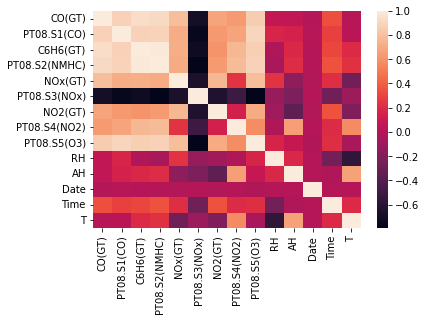

In [102]:
sns.heatmap(corr_df)

Заполенение пропущенных данных

In [103]:
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
RH               0
AH               0
Date             0
Time             0
T                0
dtype: int64

Решение поставленной задачи регрессии в соответствии с заданием.

Линейная регрессия

In [105]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [106]:
x, y = df.drop('T', axis = 1), df['T']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
linear = LinearRegression()

linear.fit(x_train, y_train)

LinearRegression()

In [109]:
linear.coef_

array([-7.08390153e+00,  2.03384934e+00, -2.27496981e+01,  1.68223877e+01,
        6.05677054e+00,  1.65061573e+00,  2.86233733e-01,  1.44890997e+01,
       -6.25968512e+00, -2.70604103e+01,  2.82729235e+01,  4.35210658e-04,
       -7.88734721e-03])

In [110]:
from scipy.stats import pearsonr, spearmanr

predict = linear.predict(x_test)
pearson, P_p_value = pearsonr(predict, y_test)
spearman, S_p_value = spearmanr(predict, y_test)

print("Spearman correlation: ", spearman)
print("Pearson correlation: ", pearson)

if P_p_value < 0.05:
    print('p_value (Pearson) is good')
else:
    print('p_value (Pearson) is not good')
if S_p_value < 0.05:
    print('p_value (Spearman) is good')
else:
    print('p_value (Spearman) is not good')

Spearman correlation:  0.97824129378393
Pearson correlation:  0.9643707872133894
p_value (Pearson) is good
p_value (Spearman) is good


Линейная регрессия. RIDGE регуляризатор

In [111]:
from sklearn.linear_model import Ridge
import numpy as np

In [112]:
reg = Ridge()

params = {'alpha': np.arange(0, 3, 0.05), 'max_iter' : np.arange(1,10)}

grid = GridSearchCV(reg, params)
grid.fit(x_train, y_train)


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95]),
                         'max_iter': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [113]:
best_alpha = grid.best_estimator_.alpha
best_max_iter = grid.best_estimator_.max_iter
best_max_iter

1

In [114]:
reg = Ridge(alpha = best_alpha, max_iter = best_max_iter)
reg.fit(x_train,y_train)
pred_reg = reg.predict(x_test)

In [115]:
pearson, P_p_value = pearsonr(pred_reg, y_test)
spearman, S_p_value = spearmanr(pred_reg, y_test)

print('Spearman correlation: ', spearman)
print('Pearson correlation: ', pearson)
if P_p_value < 0.05:
    print('p_value (Pearson) is good')
else:
    print('p_value (Pearson) is not good')
if S_p_value < 0.05:
    print('p_value (Spearman) is good')
else:
    print('p_value (Spearman) is not good')


Spearman correlation:  0.97824129378393
Pearson correlation:  0.9643707872133898
p_value (Pearson) is good
p_value (Spearman) is good


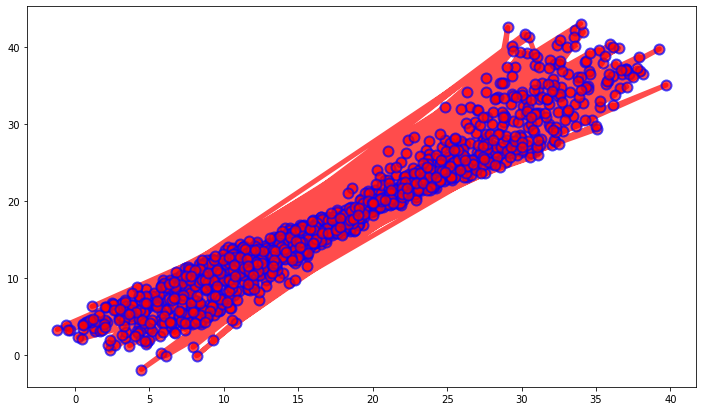

In [116]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 7))
print('hello')
plt.plot(pred_reg, y_test, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)